In [146]:
from keras import models, layers, optimizers, datasets, utils, losses
from keras.layers import Dense,Flatten,Dropout
from keras.models import Model
import string
import numpy as np
pattern_1 = np.loadtxt('pattern1.txt',delimiter=' ')
print(pattern_1.shape)

pattern_1 = np.reshape(pattern1, (26, 156))
y_train = np.array([w for w in range(26)])
y_train = np.reshape(y_train, (26, 1))

inputs = layers.Input(shape=(156,))
x = layers.Dense(156, activation = 'relu')(inputs)
x = layers.Dense(156, activation = 'relu')(x)
x = layers.Dense(156, activation = 'relu')(x)
x = layers.Dense(156, activation = 'relu')(x)
x = layers.Dense(1, activation = 'linear')(x)

model = Model(inputs=inputs, outputs=x)
model.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['accuracy'])
history = model.fit(pattern_1, y_train,epochs=100)

(312, 13)
Epoch 1/100
26/26 [==============================] - 2s 60ms/step - loss: 206.6281 - acc: 0.0385
Epoch 2/100
26/26 [==============================] - 0s 368us/step - loss: 193.8619 - acc: 0.0385
Epoch 3/100
26/26 [==============================] - 0s 230us/step - loss: 180.6863 - acc: 0.0385
Epoch 4/100
26/26 [==============================] - 0s 384us/step - loss: 165.2503 - acc: 0.0385
Epoch 5/100
26/26 [==============================] - 0s 230us/step - loss: 146.5626 - acc: 0.0385
Epoch 6/100
26/26 [==============================] - 0s 269us/step - loss: 124.6572 - acc: 0.0385
Epoch 7/100
26/26 [==============================] - 0s 230us/step - loss: 100.7097 - acc: 0.0385
Epoch 8/100
26/26 [==============================] - 0s 155us/step - loss: 77.1783 - acc: 0.0000e+00
Epoch 9/100
26/26 [==============================] - 0s 0us/step - loss: 58.7787 - acc: 0.0385
Epoch 10/100
26/26 [==============================] - 0s 0us/step - loss: 52.8157 - acc: 0.0000e+00
Epoch 11/

Epoch 85/100
26/26 [==============================] - 0s 230us/step - loss: 0.0293 - acc: 1.0000
Epoch 86/100
26/26 [==============================] - 0s 230us/step - loss: 0.0236 - acc: 1.0000
Epoch 87/100
26/26 [==============================] - 0s 268us/step - loss: 0.0311 - acc: 1.0000
Epoch 88/100
26/26 [==============================] - 0s 230us/step - loss: 0.0276 - acc: 1.0000
Epoch 89/100
26/26 [==============================] - 0s 192us/step - loss: 0.0221 - acc: 1.0000
Epoch 90/100
26/26 [==============================] - 0s 230us/step - loss: 0.0255 - acc: 1.0000
Epoch 91/100
26/26 [==============================] - 0s 192us/step - loss: 0.0216 - acc: 1.0000
Epoch 92/100
26/26 [==============================] - 0s 230us/step - loss: 0.0157 - acc: 1.0000
Epoch 93/100
26/26 [==============================] - 0s 230us/step - loss: 0.0172 - acc: 1.0000
Epoch 94/100
26/26 [==============================] - 0s 192us/step - loss: 0.0143 - acc: 1.0000
Epoch 95/100
26/26 [==========

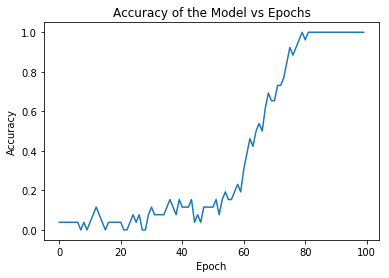

In [147]:
#Accuracy Curve
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('Accuracy of the Model vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

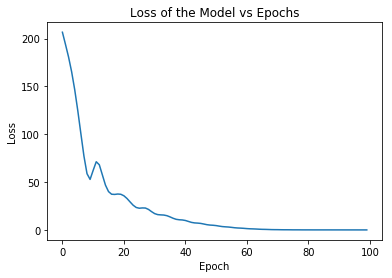

In [148]:
#The loss curve
plt.plot(history.history['loss'])
plt.title('Loss of the Model vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [151]:
#Pattern 2 prediction
pattern_2 = np.loadtxt('pattern2.txt')
pattern_2 = pattern_2.reshape(1,156)
y_pre = model.predict(pattern_2)
print(y_pre)
chr(ord('A')+int(round(y_pre[0,0])))

[[9.723636]]


'K'

In [143]:
def create_noise(totalnodes,percentage):
    total_bits = (percentage*totalnodes)/100
    random_integers = np.random.randint(0,156,int(total_bits))
    print(random_integers.shape)
    #For safety
    x_noise = pattern_1
    for w in range(26):
        for y in random_integers:
            if x_noise[w,y] == 0:
                x_noise[w,y] = 1
            else:
                x_noise[w,y] = 0
    return x_noise

In [144]:
x_noise_1 = create_noise(156,10)
x_noise_2 = create_noise(156,20)
x_noise_3 = create_noise(156,30)
x_noise_4 = create_noise(156,55)


(15,)
(31,)
(46,)
(85,)


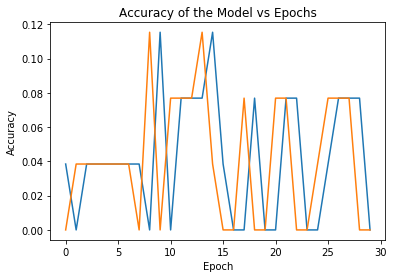

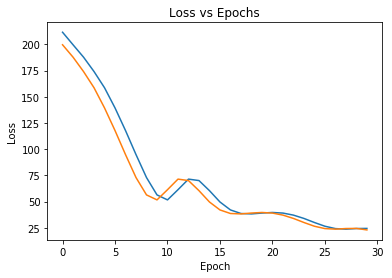

In [145]:
inputs = layers.Input(shape=(156,))
x = layers.Dense(156, activation = 'relu')(inputs)
x = layers.Dense(156, activation = 'relu')(x)
x = layers.Dense(156, activation = 'relu')(x)
x = layers.Dense(156, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'linear')(x)

model1 = Model(inputs=inputs, outputs=outputs)
model1.compile(loss=losses.mean_squared_error, optimizer='Adam', metrics=['accuracy'])

history = model1.fit(pattern_1, y_train,epochs=30,verbose=0,validation_data=(x_noise_4, y_train))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy of the Model vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [154]:
x1 = layers.Dense(156, activation = 'relu')(inputs)
x1 = layers.Dense(156, activation = 'relu')(x1)
x1 = layers.Dense(156, activation = 'relu')(x1)
x1 = layers.Dense(156, activation = 'relu')(x1)
x1 = layers.Dense(156, activation = 'relu')(x1)
x1 = layers.Dense(1, activation = 'linear')(x1)

model1 = Model(inputs=inputs, outputs=x1)
model1.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['accuracy'])

x2 = layers.Dense(156, activation = 'relu')(inputs)
x2 = layers.Dense(156, activation = 'relu')(x2)
x2 = layers.Dense(156, activation = 'relu')(x2)
x2 = layers.Dense(156, activation = 'relu')(x2)
x2 = layers.Dense(156, activation = 'relu')(x2)
x2 = layers.Dense(156, activation = 'relu')(x2)
x2 = layers.Dense(1, activation = 'linear')(x2)

model2 = Model(inputs=inputs, outputs=x2)
model2.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['accuracy'])

x3 = layers.Dense(156, activation = 'relu')(inputs)
x3 = layers.Dense(156, activation = 'relu')(x3)
x3 = layers.Dense(156, activation = 'relu')(x3)
x3 = layers.Dense(156, activation = 'relu')(x3)
x3 = layers.Dense(156, activation = 'relu')(x3)
x3 = layers.Dense(156, activation = 'relu')(x3)
x3 = layers.Dense(156, activation = 'relu')(x3)
x3 = layers.Dense(1, activation = 'linear')(x3)

model3 = Model(inputs=inputs, outputs=x3)
model3.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['accuracy'])

x4 = layers.Dense(156, activation = 'relu')(inputs)
x4 = layers.Dense(156, activation = 'relu')(x4)
x4 = layers.Dense(156, activation = 'relu')(x4)
x4 = layers.Dense(156, activation = 'relu')(x4)
x4 = layers.Dense(156, activation = 'relu')(x4)
x4 = layers.Dense(156, activation = 'relu')(x4)
x4 = layers.Dense(156, activation = 'relu')(x4)
x4 = layers.Dense(1, activation = 'linear')(x4)

model4 = Model(inputs=inputs, outputs=x4)
model4.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['accuracy'])

(1,)
26/26 [==============================] - 0s 0us/step
[54.53651809692383, 0.07692307978868484]
(32,)
26/26 [==============================] - 0s 0us/step
[57.572265625, 0.07692307978868484]
(63,)
26/26 [==============================] - 0s 0us/step
[73.53832244873047, 0.07692307978868484]
(95,)
26/26 [==============================] - 0s 0us/step
[84.20054626464844, 0.0]
(126,)
26/26 [==============================] - 0s 0us/step
[99.04964447021484, 0.03846153989434242]


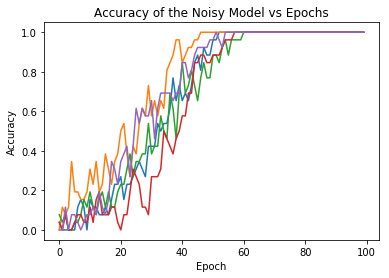

(1,)
26/26 [==============================] - 1s 31ms/step
[61.21279525756836, 0.0]
(32,)
26/26 [==============================] - 0s 0us/step
[64.88748168945312, 0.03846153989434242]
(63,)
26/26 [==============================] - 0s 0us/step
[54.27710723876953, 0.03846153989434242]
(95,)
26/26 [==============================] - 0s 0us/step
[37.513675689697266, 0.03846153989434242]
(126,)
26/26 [==============================] - 0s 0us/step
[51.716609954833984, 0.07692307978868484]


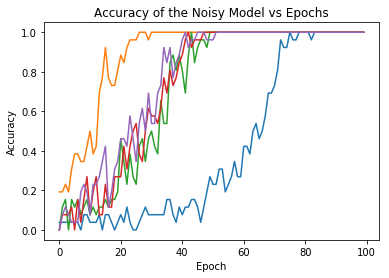

(1,)
26/26 [==============================] - 1s 25ms/step
[69.79304504394531, 0.11538461595773697]
(32,)
26/26 [==============================] - 0s 0us/step
[82.62179565429688, 0.07692307978868484]
(63,)
26/26 [==============================] - 0s 0us/step
[69.42298126220703, 0.11538461595773697]
(95,)
26/26 [==============================] - 0s 0us/step
[66.3083724975586, 0.0]
(126,)
26/26 [==============================] - 0s 0us/step
[48.607242584228516, 0.03846153989434242]


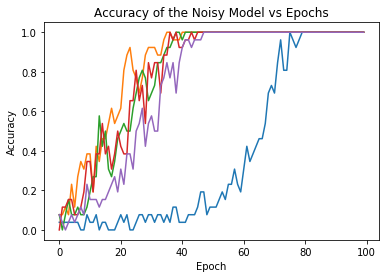

(1,)
26/26 [==============================] - 1s 26ms/step
[57.63218307495117, 0.03846153989434242]
(32,)
26/26 [==============================] - 0s 77us/step
[50.46891784667969, 0.03846153989434242]
(63,)
26/26 [==============================] - 0s 153us/step
[27.378772735595703, 0.0]
(95,)
26/26 [==============================] - 0s 77us/step
[37.808467864990234, 0.11538461595773697]
(126,)
26/26 [==============================] - 0s 0us/step
[46.93215560913086, 0.0]


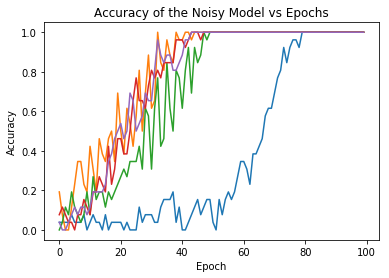

(1,)
26/26 [==============================] - 1s 29ms/step
[44.87797546386719, 0.0]
(32,)
26/26 [==============================] - 0s 77us/step
[43.85775375366211, 0.03846153989434242]
(63,)
26/26 [==============================] - 0s 0us/step
[42.79065704345703, 0.03846153989434242]
(95,)
26/26 [==============================] - 0s 0us/step
[38.044498443603516, 0.11538461595773697]
(126,)
26/26 [==============================] - 0s 115us/step
[36.407772064208984, 0.0]


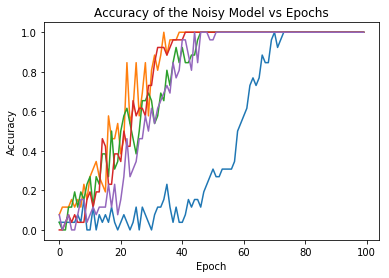

In [155]:
def noise_performance(models):
    total_nodes = 156
    percentage = 1
    steps = 20
    plt.title('Accuracy of the Noisy Model vs Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    result = []
    while percentage < 100 :
        x_noise = create_noise(156,percentage)
        history = models.fit(x_noise, y_train,epochs=100,verbose=0)
        accuracuy = models.evaluate(x_train,y_train)
        print(accuracuy)
        plt.plot(history.history['acc'])
        percentage = percentage + steps
    plt.show()
noise_performance(model)
noise_performance(model1)
noise_performance(model2)
noise_performance(model3)
noise_performance(model4)

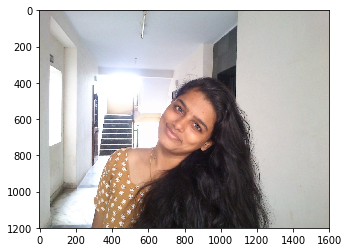

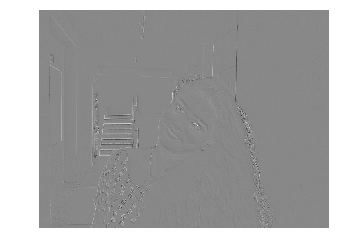

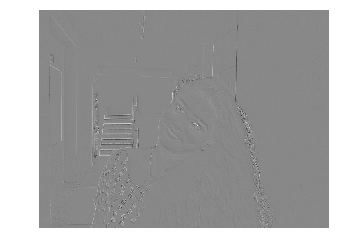

In [18]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure
img = io.imread('testimg.jpeg')
plt.imshow(img)
plt.show()
img = color.rgb2gray(img)
kernel = np.array([[-1,-1,8],[-1,-1,-1],[-1,-1,-1]])
edges = scipy.signal.convolve2d(img, kernel, mode='same')
plt.imshow(edges, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
sobel_filter = np.array([[-8,0,8],[-16,0,16],[-8,0,8]])
sobel_edges = scipy.signal.convolve2d(img, sobel_filter, mode='same')
plt.imshow(edges,cmap=plt.cm.gray)
plt.axis('off')
plt.show()